In [1]:
# %%

import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split



# %%
digits = datasets.load_digits()

#
# Tamaño del dataset
#
digits.images.shape


#
# Ejemplo de una imagen (data)
#
digits.images[0, :, :]




array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

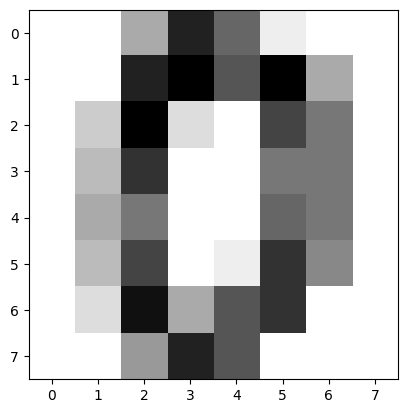

In [2]:
#
set(digits.target)


# %%
#
# Ejemplo de una imagen
#
plt.figure()
plt.imshow(digits.images[0], cmap=plt.cm.binary)
plt.grid(False)
plt.show()


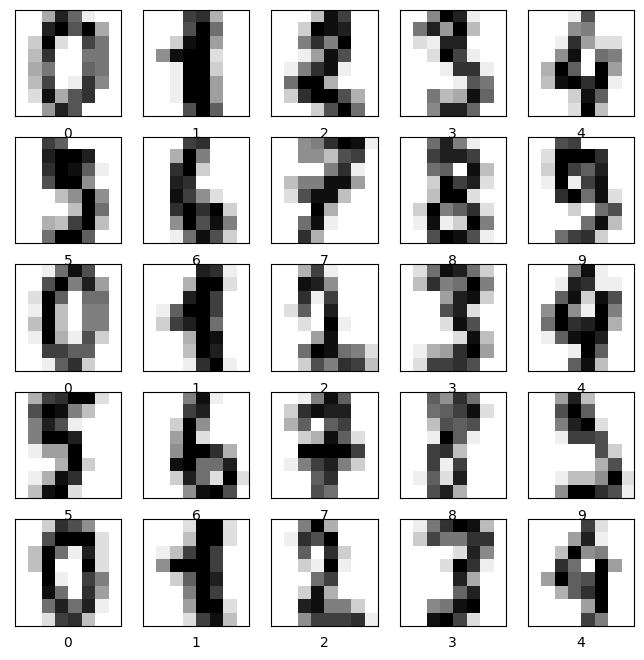

In [3]:
# %%
plt.figure(figsize=(8, 8))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(digits.images[i], cmap=plt.cm.binary)
    plt.xlabel(digits.target[i])
plt.show()



In [4]:
# %%
# Cambio de las dimensiones de los datos
#
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
data.shape#

(1797, 64)

In [5]:
#
# Particionamiento de los datos
#
X_train, X_test, y_train, y_test = train_test_split(
    data,
    digits.target,
    test_size=0.5,
    shuffle=False,
)


In [6]:

from sklearn.linear_model import LogisticRegression

estimator = LogisticRegression(max_iter=1000)
estimator



estimator.fit(
    X_train,
    y_train,
)



estimator.intercept_



estimator.coef_

c:\Users\sdyri\Documents\AnaliticaPredictiva\PRE-04-clasificacion-basica-de-imagenes-emcorream\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


array([[ 0.00000000e+00, -5.74998054e-03, -3.99314234e-02,
         5.61250118e-02,  1.56426242e-02, -3.80582359e-02,
        -8.77227965e-02, -1.02415933e-02, -1.13152505e-05,
        -2.40648822e-02, -4.35169841e-02,  6.04952572e-02,
         4.20973804e-02,  6.38161992e-02, -5.85573342e-03,
        -1.12533484e-02, -8.04472996e-07,  2.23341384e-02,
         8.93781223e-02, -2.20087572e-03, -1.16708581e-01,
         6.87048683e-02,  1.03722366e-01, -3.03717330e-03,
        -8.04749254e-07,  4.74822746e-02,  1.08238476e-01,
        -1.40073271e-01, -3.42692322e-01, -2.06907629e-02,
         1.79725361e-01, -8.58848045e-07,  0.00000000e+00,
         1.09856034e-01,  7.07173092e-02, -2.03320398e-01,
        -2.32263699e-01, -3.85837431e-03,  1.17249804e-01,
         0.00000000e+00, -5.92981548e-06,  3.82642528e-02,
         1.27835419e-01, -1.69340568e-02, -1.20601530e-01,
         8.09862111e-02,  5.51792113e-02, -3.27229381e-06,
        -1.13364970e-05, -4.61933814e-02,  9.43004228e-0

In [7]:
from sklearn.metrics import accuracy_score

#
# Muestra de entrenamiento
#
accuracy_score(y_true=y_train, y_pred=estimator.predict(X_train))



1.0

In [8]:
#
# Muestra de prueba
#
predictions = estimator.predict(X_test)
predicted_proba = estimator.predict_proba(X_test)

accuracy_score(y_true=y_test, y_pred=predictions)




0.9310344827586207

Confusion matrix:
[[85  0  0  0  1  0  2  0  0  0]
 [ 0 79  0  1  0  0  0  0  2  9]
 [ 0  0 84  2  0  0  0  0  0  0]
 [ 0  0  0 76  0  4  0  2  7  2]
 [ 0  0  0  0 85  0  3  0  0  4]
 [ 0  0  0  0  0 87  2  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  1  0  0 85  1  2]
 [ 0  2  1  0  0  3  1  1 79  1]
 [ 1  0  0  0  0  2  0  0  2 87]]


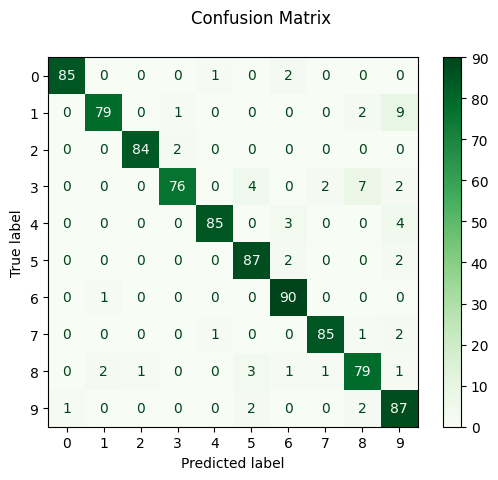

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_predictions(
    y_test,
    predictions,
    cmap="Greens",
)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")




In [12]:

def plot_image(i, predicted_label, true_label, predicted_proba, img):

    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    #
    plt.imshow(img, cmap=plt.cm.binary)

    if predicted_label[i] == true_label:
        color = "blue"
    else:
        color = "red"

    plt.xlabel(
        "{} {:2.0f}% ({})".format(
            predicted_label[i],
            100 * max(predicted_proba[i, :]),
            true_label,
        ),
        color=color,
    )



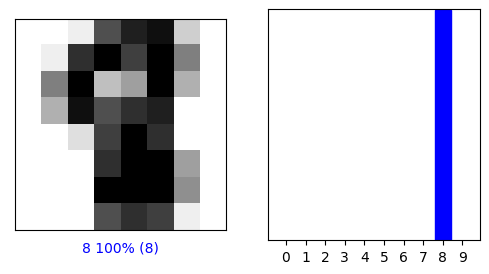

In [14]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(
    i,
    predictions,
    y_test,
    predicted_proba,
    X_test.reshape(len(X_test), 8, 8),
)
plt.subplot(1, 2, 2)
plot_value_array(
    i,
    predicted_proba,
    predictions,
    y_test,
)
plt.show()    
    

In [15]:
def plot_value_array(i, predicted_proba, predicted_label, true_label):
    #
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predicted_proba[i, :], color="#777777")
    plt.ylim([0, 1])
    #
    thisplot[predicted_label[i]].set_color("red")
    thisplot[true_label[i]].set_color("blue")

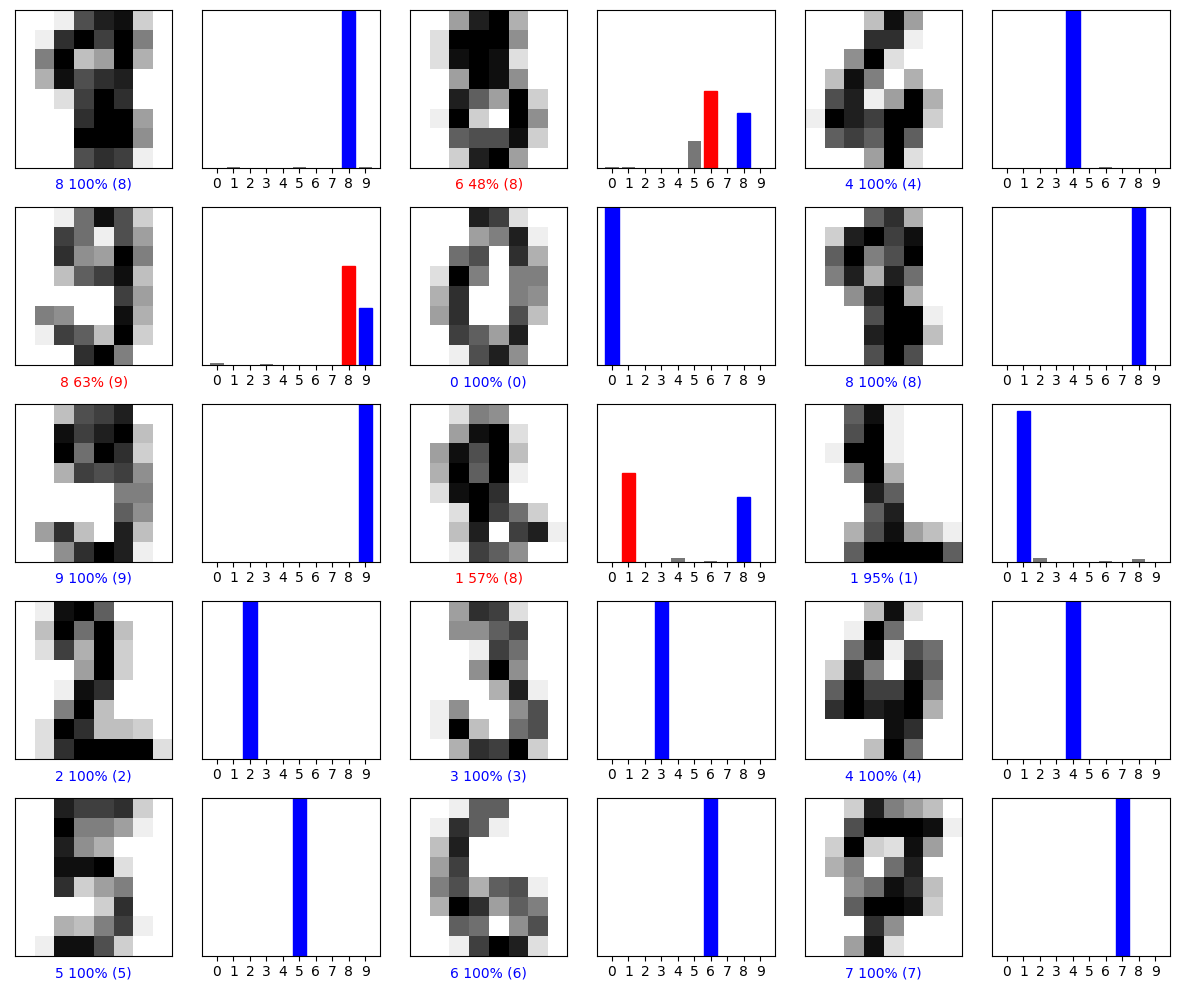

In [16]:
    
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols

plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(
        i,
        predictions,
        y_test,
        predicted_proba,
        X_test.reshape(len(X_test), 8, 8),
    )
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(
        i,
        predicted_proba,
        predictions,
        y_test,
    )
plt.tight_layout()

In [17]:
import pickle

with open("estimator.pickle", "wb") as file:
    pickle.dump(estimator, file)
    

In [18]:
with open("estimator.pickle", "rb") as file:
    new_clf = pickle.load(file)

accuracy_score(
    y_true=digits.target,
    y_pred=new_clf.predict(data),
)


0.9654980523094046